In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
train_data = pd.read_csv('Life_train.csv')
test_data = pd.read_csv('Life_test.csv')

In [106]:
train_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2322.000000,2489.000000,2009.000000,2489.000000,2461.000000,2489.000000,2471.000000,2293.000000,2471.000000,2489.000000,2103.000000,1.935000e+03,2461.000000,2461.000000,2343.00000,2343.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.600060,719.997905,80.884520,2508.917638,38.197887,44.378063,82.441926,5.952891,82.095508,1.777581,7320.511081,1.267212e+07,4.837424,4.882974,0.62521,11.932864
std,4.593657,9.626188,125.091120,122.898636,4.021613,1968.953987,25.110227,11795.371317,19.919937,167.571112,23.423987,2.489485,23.948337,5.184826,14023.224494,6.032759e+07,4.435967,4.546285,0.21130,3.387830
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.00000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.902500,4.344931,77.000000,0.000000,19.300000,0.000000,77.000000,4.280000,78.000000,0.100000,462.318087,2.062425e+05,1.600000,1.500000,0.48800,10.000000
50%,2007.000000,72.100000,144.000000,3.000000,3.775000,64.605901,92.000000,15.000000,43.200000,4.000000,93.000000,5.780000,93.000000,0.100000,1757.177970,1.395398e+06,3.300000,3.400000,0.67600,12.300000
75%,2011.000000,75.700000,228.000000,23.000000,7.677500,431.545247,97.000000,357.000000,56.200000,29.000000,97.000000,7.500000,97.000000,0.800000,5903.413690,7.321861e+06,7.200000,7.200000,0.77900,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.600000


In [107]:
test_data.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,439.000000,439.000000,439.000000,413.000000,439.000000,366.000000,439.000000,435.000000,439.000000,438.000000,409.000000,438.000000,439.000000,382.000000,3.490000e+02,435.000000,435.000000,425.000000,425.000000
mean,2007.760820,160.710706,21.801822,4.698039,855.548162,81.379781,1968.259681,38.447586,29.712984,83.148402,5.802738,83.595890,1.578360,8450.468152,1.327699e+07,4.925287,4.872644,0.639595,12.367765
std,4.702056,119.717154,85.707661,4.214880,2109.865590,24.537375,9542.670214,20.204293,113.528966,23.393038,2.447254,22.277194,4.482835,15616.823227,6.492235e+07,4.338458,4.301250,0.209022,3.086263
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,1.150000,3.000000,0.100000,12.989164,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,70.000000,0.000000,0.930000,8.331114,78.000000,0.000000,19.450000,1.000000,81.000000,4.200000,81.000000,0.100000,475.495967,1.527790e+05,1.700000,1.700000,0.533000,10.500000
50%,2008.000000,143.000000,3.000000,3.630000,69.359248,92.000000,25.000000,44.300000,3.000000,93.000000,5.650000,93.000000,0.100000,1837.958058,1.362722e+06,3.300000,3.300000,0.684000,12.500000
75%,2012.000000,224.500000,19.000000,7.910000,501.659304,96.000000,417.500000,55.900000,23.000000,97.000000,7.470000,97.000000,0.600000,6555.379361,7.912398e+06,7.250000,7.250000,0.780000,14.500000
max,2015.000000,686.000000,1600.000000,17.870000,18822.867320,99.000000,124219.000000,76.200000,2100.000000,99.000000,13.130000,99.000000,42.100000,87998.444680,1.126136e+09,27.200000,28.200000,0.932000,20.700000


In [108]:
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [111]:
display(train_data.head())
display(test_data.head())

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2005,116.0,0,11.59,167.231990,NaN,2,57.5,0,96.0,6.89,96.0,0.1,1224.245900,4442.0,1.8,1.8,0.777,13.6
1,2011,139.0,2,9.10,10.325889,96.0,4189,57.7,2,89.0,5.53,89.0,0.1,92.277825,2147528.0,2.9,3.1,0.798,15.7
2,2003,126.0,1,5.52,58.459760,98.0,0,48.6,2,95.0,7.60,98.0,0.1,4267.135780,329174.0,2.2,2.2,0.728,12.8
3,2008,295.0,237,2.09,0.000000,65.0,12461,18.2,324,64.0,4.46,65.0,1.8,NaN,NaN,1.8,1.7,NaN,NaN
4,2010,178.0,23,0.24,84.623025,82.0,190,16.4,30,83.0,6.43,82.0,0.2,592.183522,2723137.0,16.7,17.2,0.515,11.1


In [112]:
print(train_data.isna().sum())
print()
print(test_data.isna().sum())


Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
BMI                                 28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
HIV/AIDS                             0
GDP                                386
Population                         554
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    146
Schooling                          146
dtype: int64

Year                                0
Adult Mortality                     0
infant deaths                       0
Alcohol                            26
percentage expenditure              0
Hepatitis B     

In [113]:
train_data.columns = train_data.columns.str.strip()

<Figure size 1500x800 with 0 Axes>

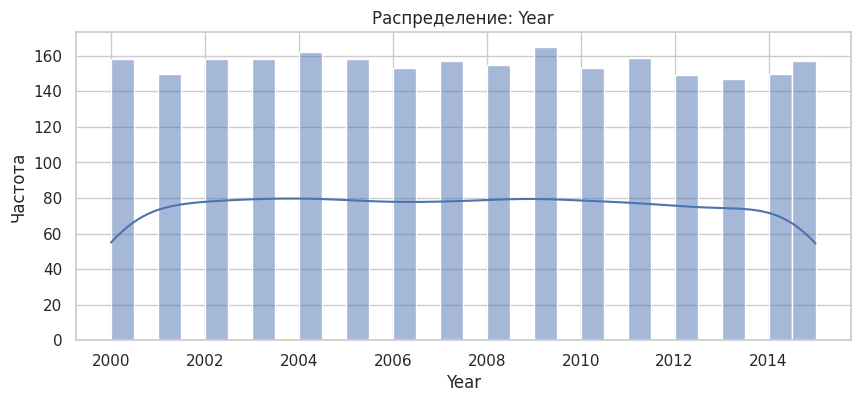

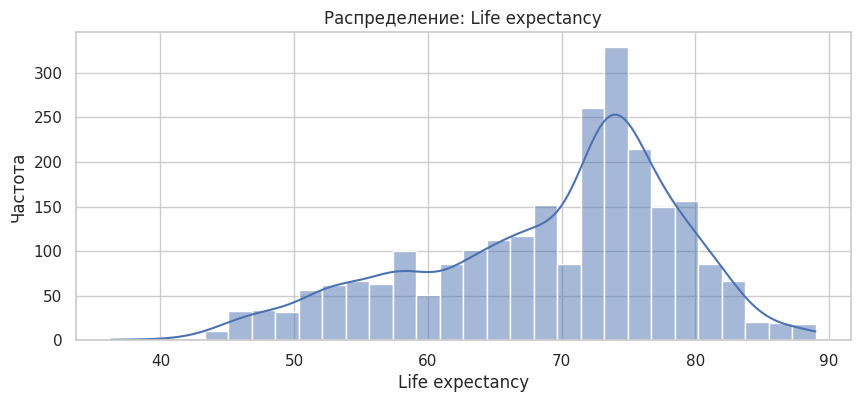

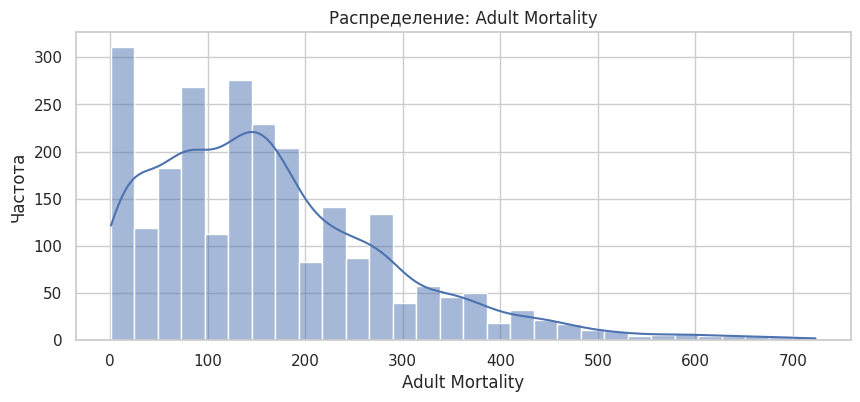

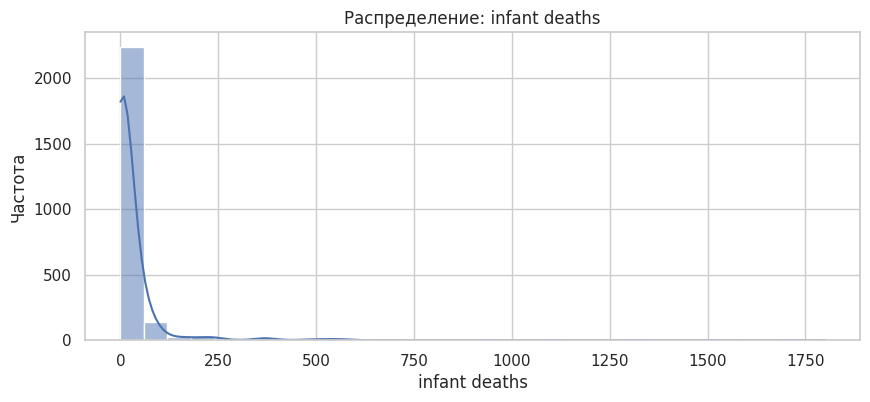

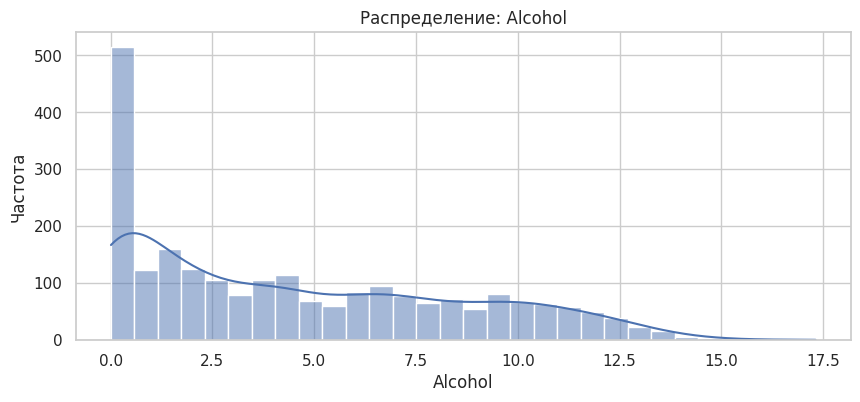

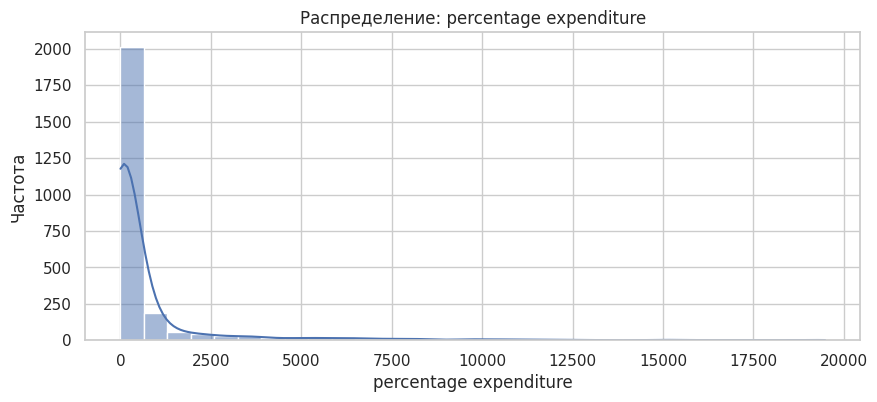

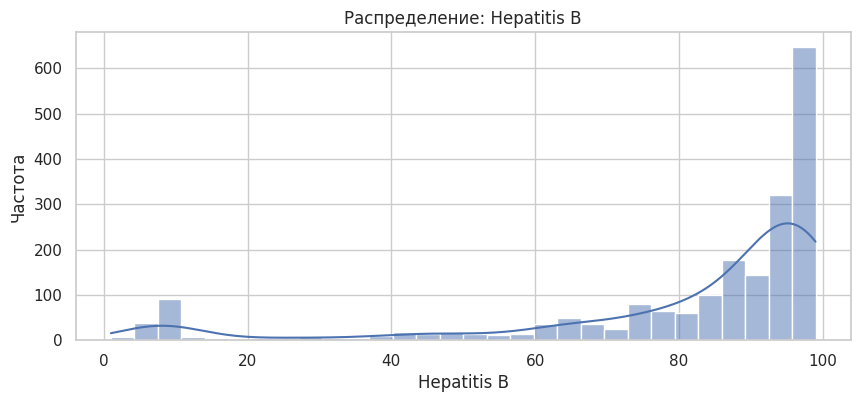

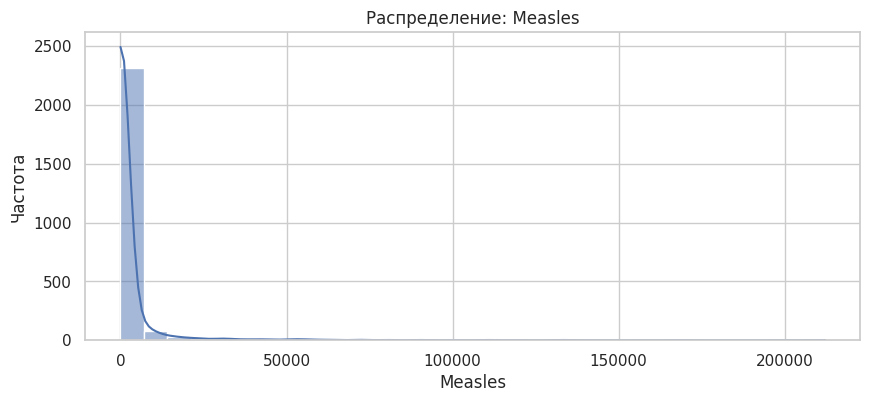

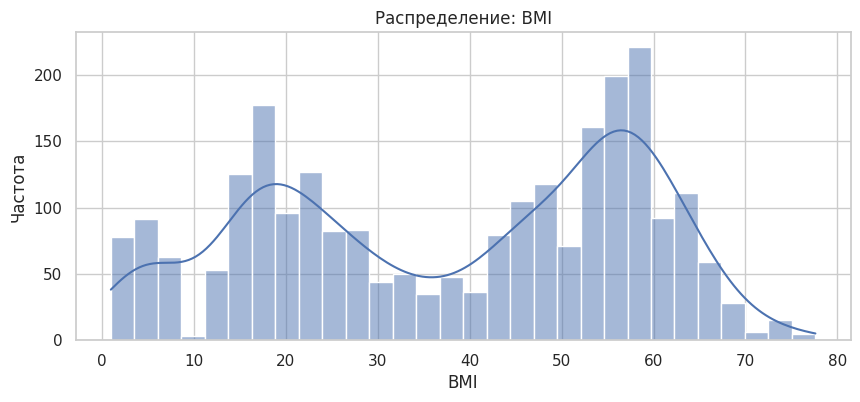

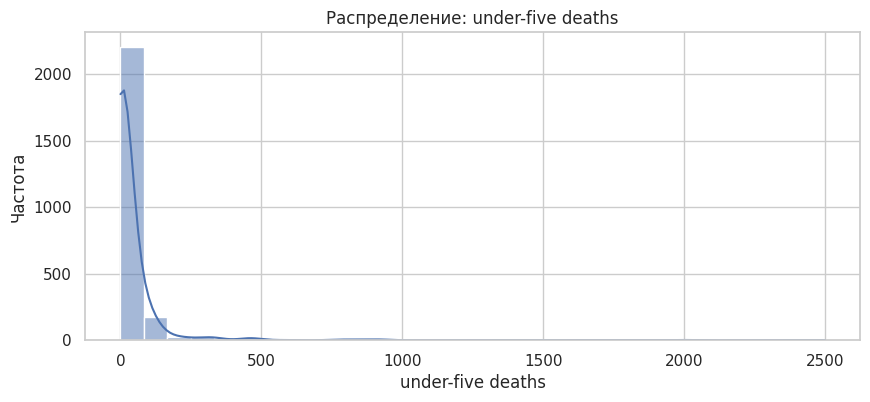

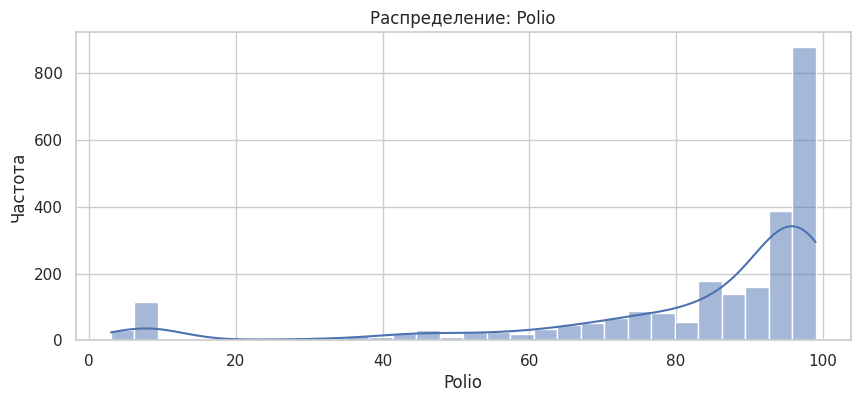

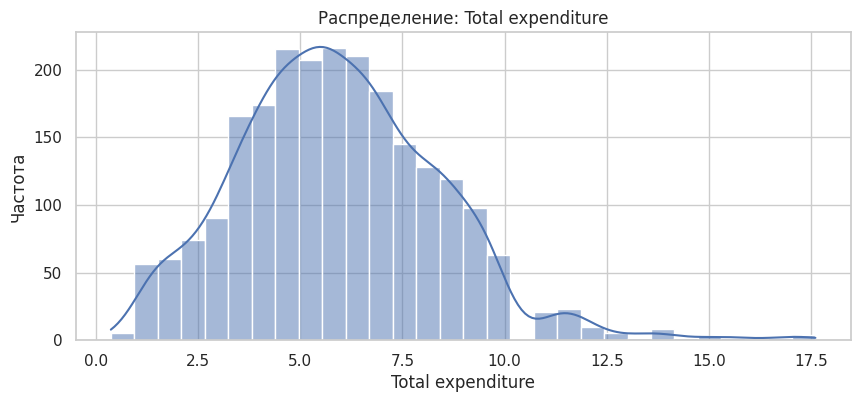

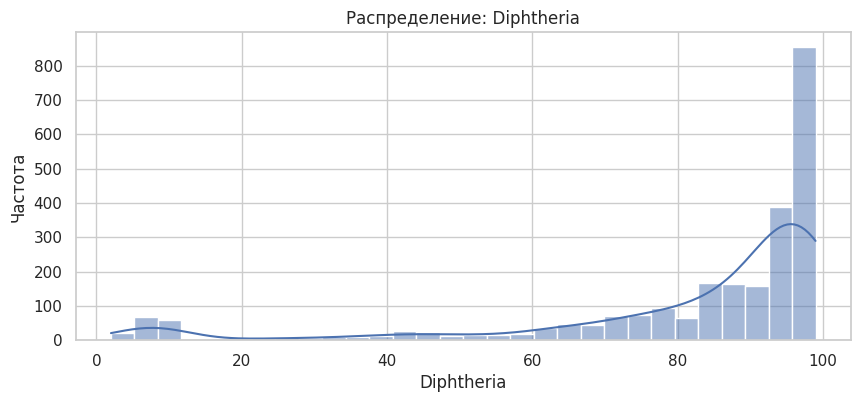

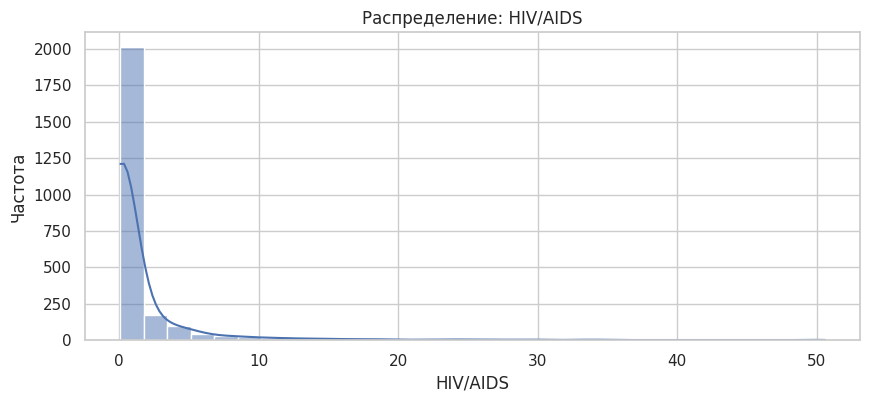

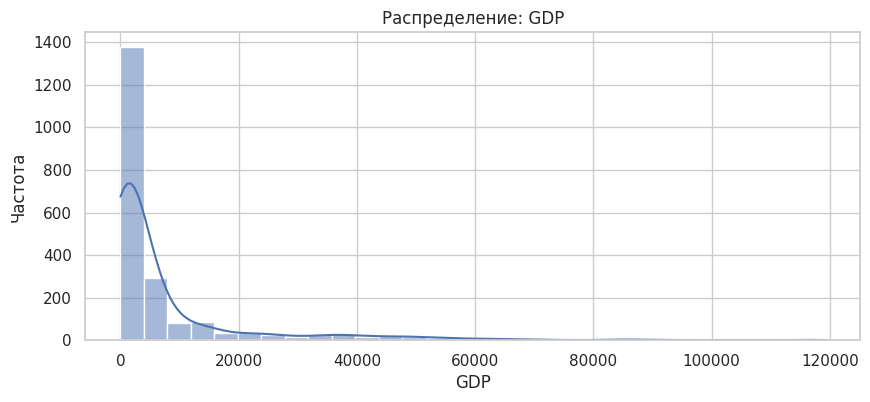

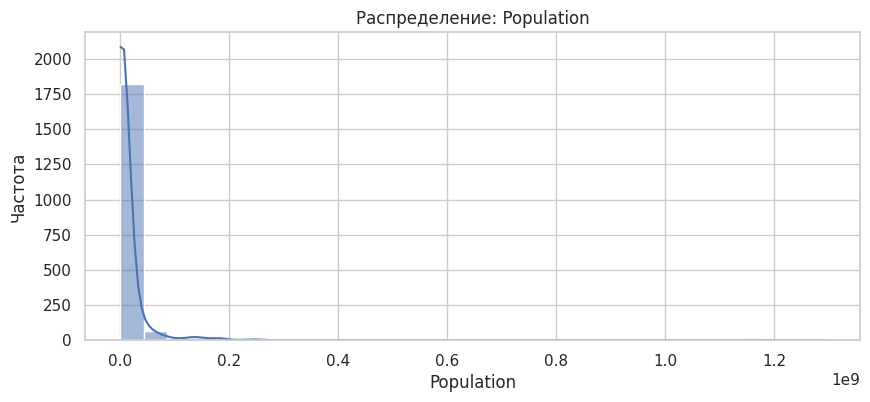

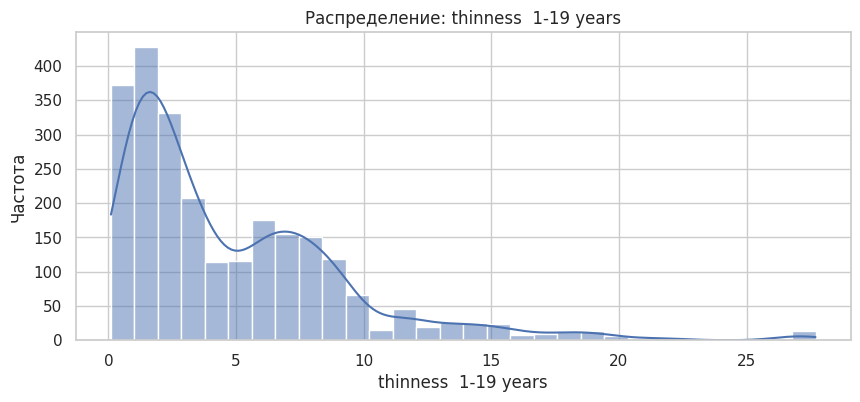

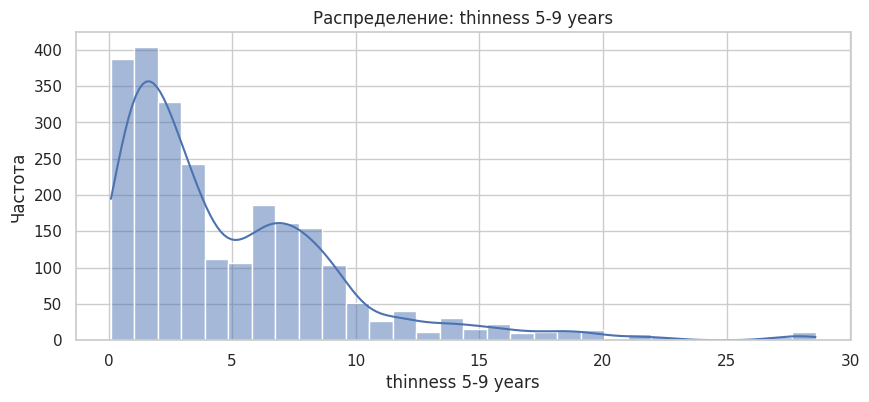

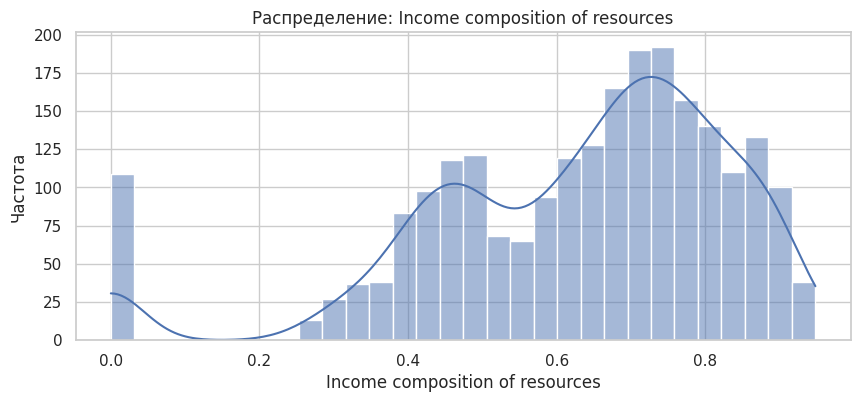

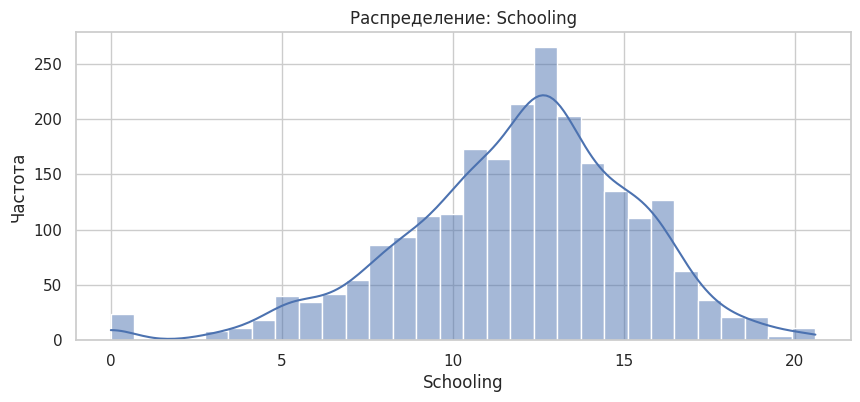

In [114]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for column in train_data.columns:
    plt.figure(figsize=(10, 4))
    if train_data[column].dtype in ['float64', 'int64']:
        sns.histplot(train_data[column], kde=True, bins=30)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    else:
        sns.countplot(data=train_data, x=column)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    plt.show()

In [115]:
X = train_data.drop(columns=['Life expectancy'])
y = train_data['Life expectancy']

In [116]:
medians = X.median()

X_imputed = X.fillna(medians)

In [117]:
print(train_data.isna().sum())
print()
print(test_data.isna().sum())



Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
BMI                                 28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
HIV/AIDS                             0
GDP                                386
Population                         554
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    146
Schooling                          146
dtype: int64

Year                                0
Adult Mortality                     0
infant deaths                       0
Alcohol                            26
percentage expenditure              0
Hepatitis B     

<Figure size 1500x800 with 0 Axes>

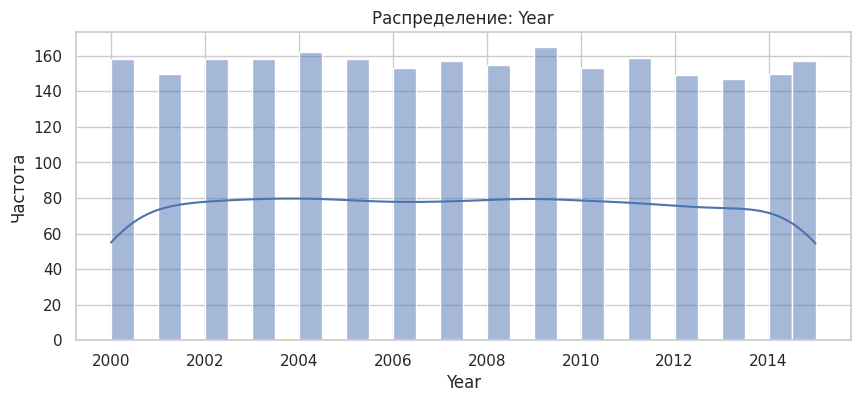

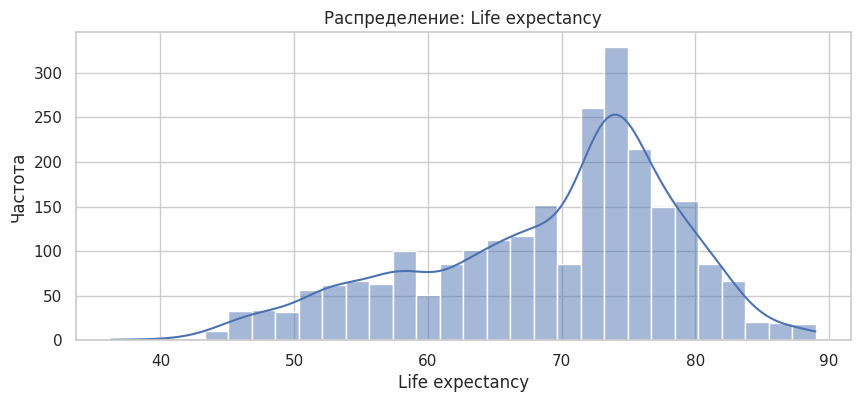

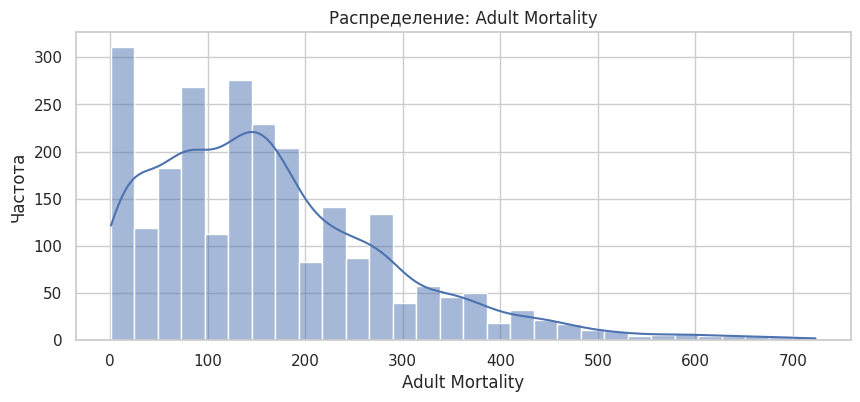

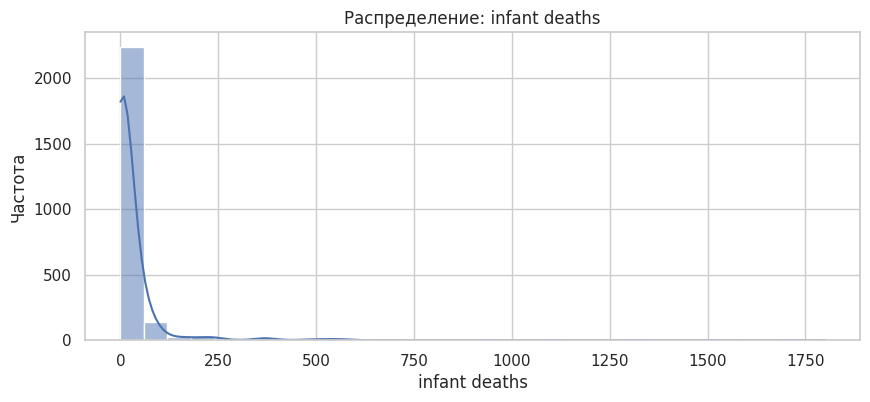

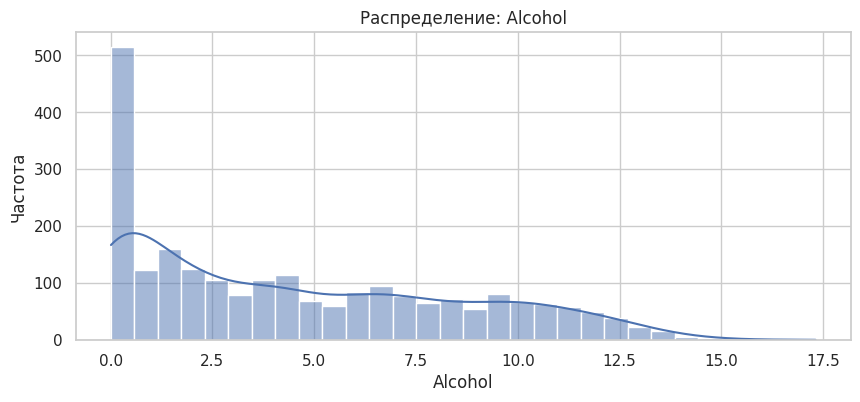

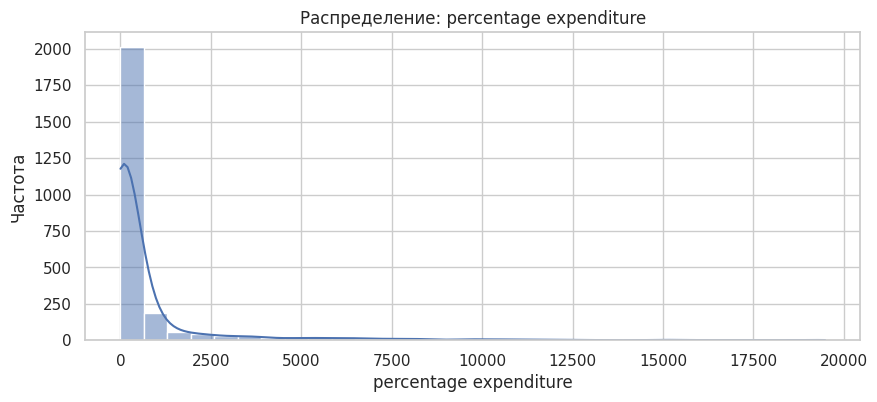

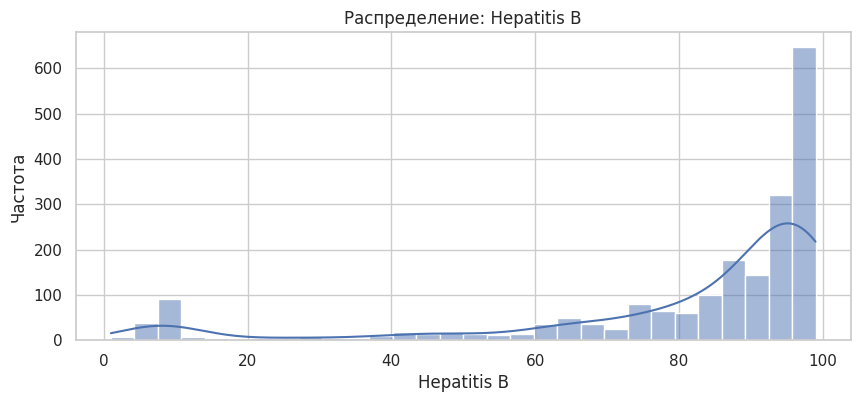

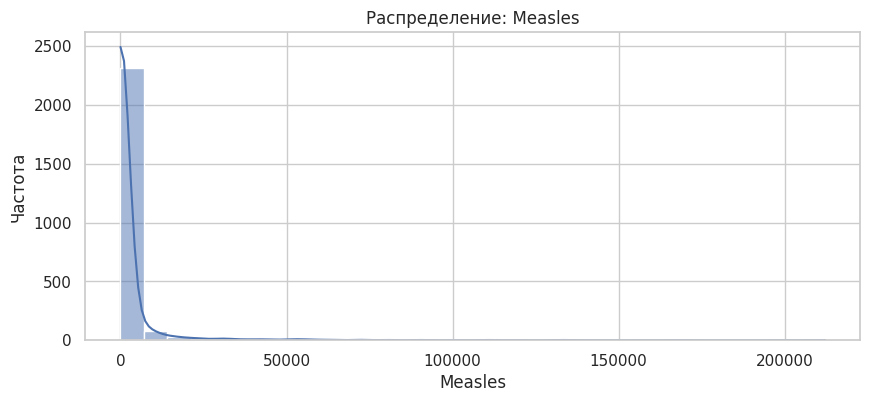

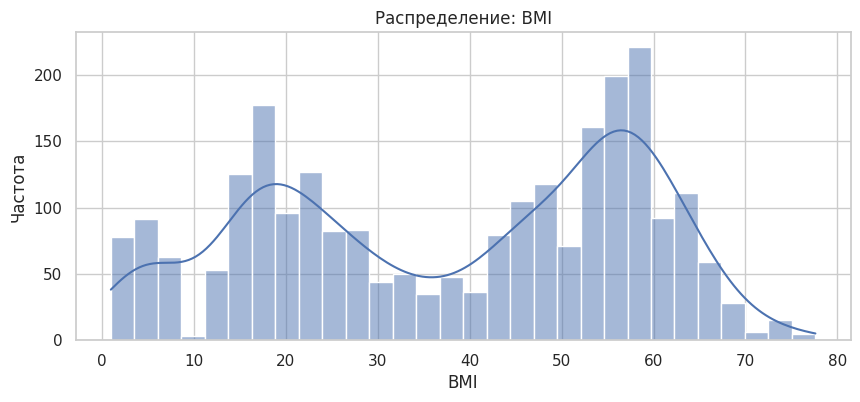

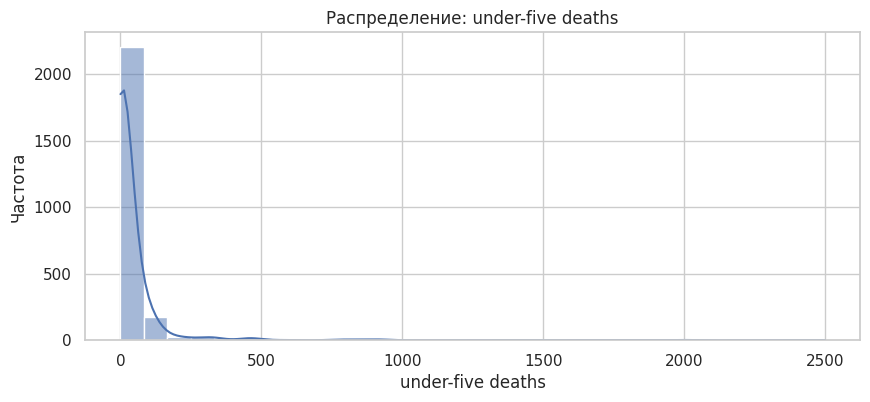

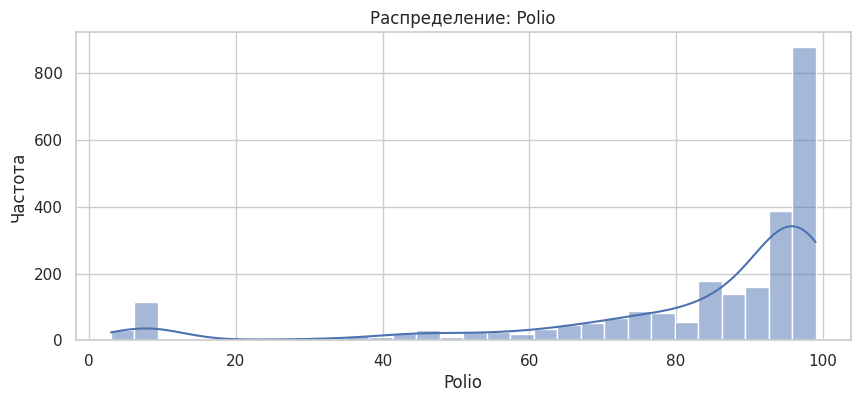

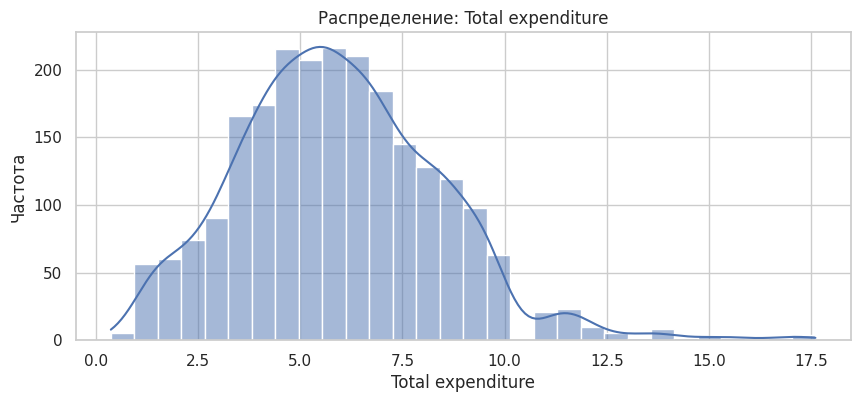

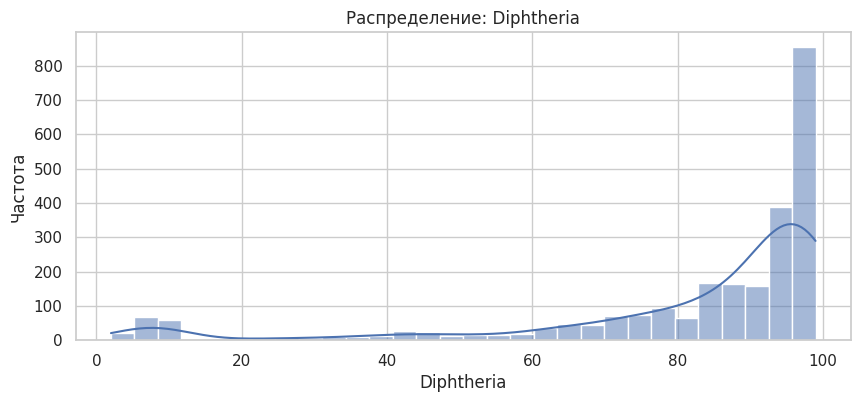

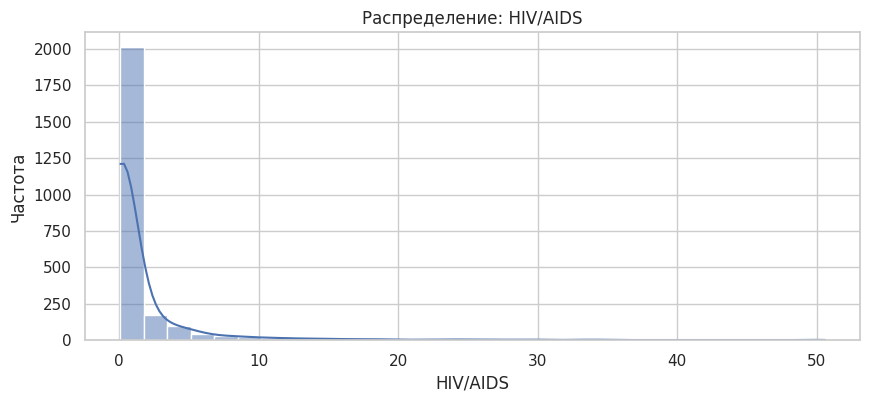

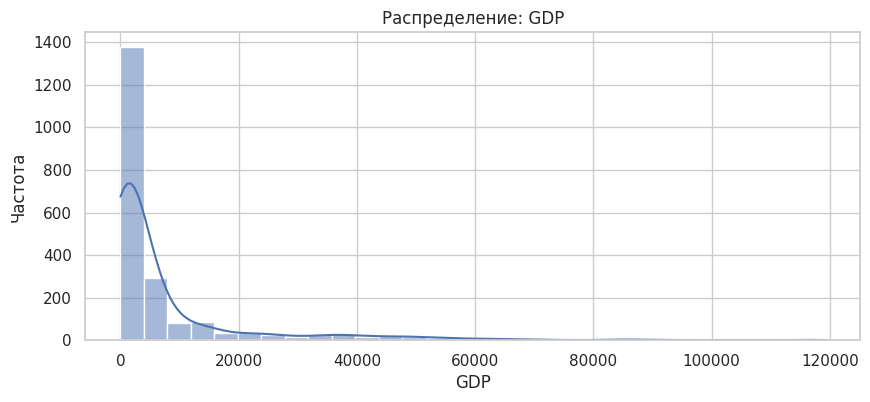

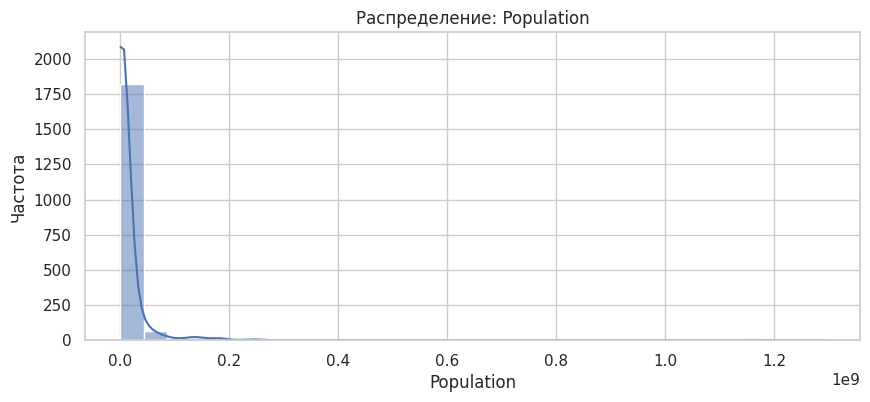

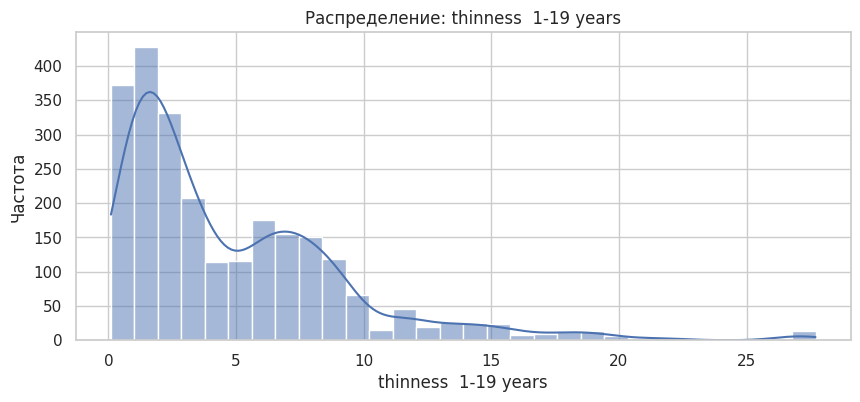

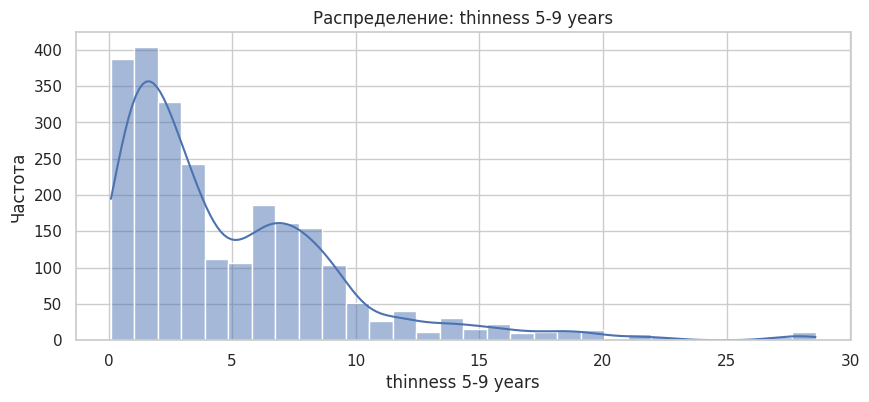

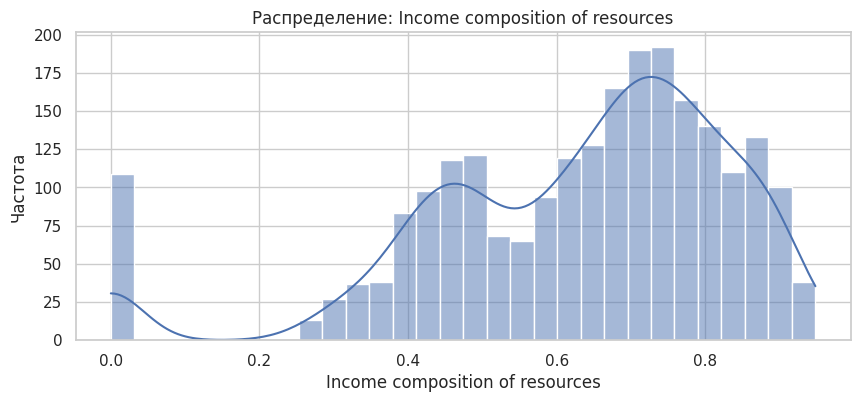

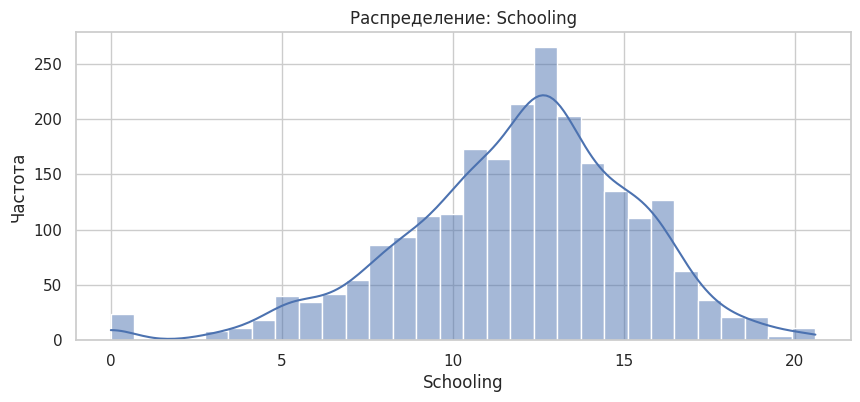

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

for column in train_data.columns:
    plt.figure(figsize=(10, 4))
    if train_data[column].dtype in ['float64', 'int64']:
        sns.histplot(train_data[column], kde=True, bins=30)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    else:
        sns.countplot(data=train_data, x=column)
        plt.title(f"Распределение: {column}")
        plt.xlabel(column)
        plt.ylabel("Частота")
    plt.show()

In [119]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

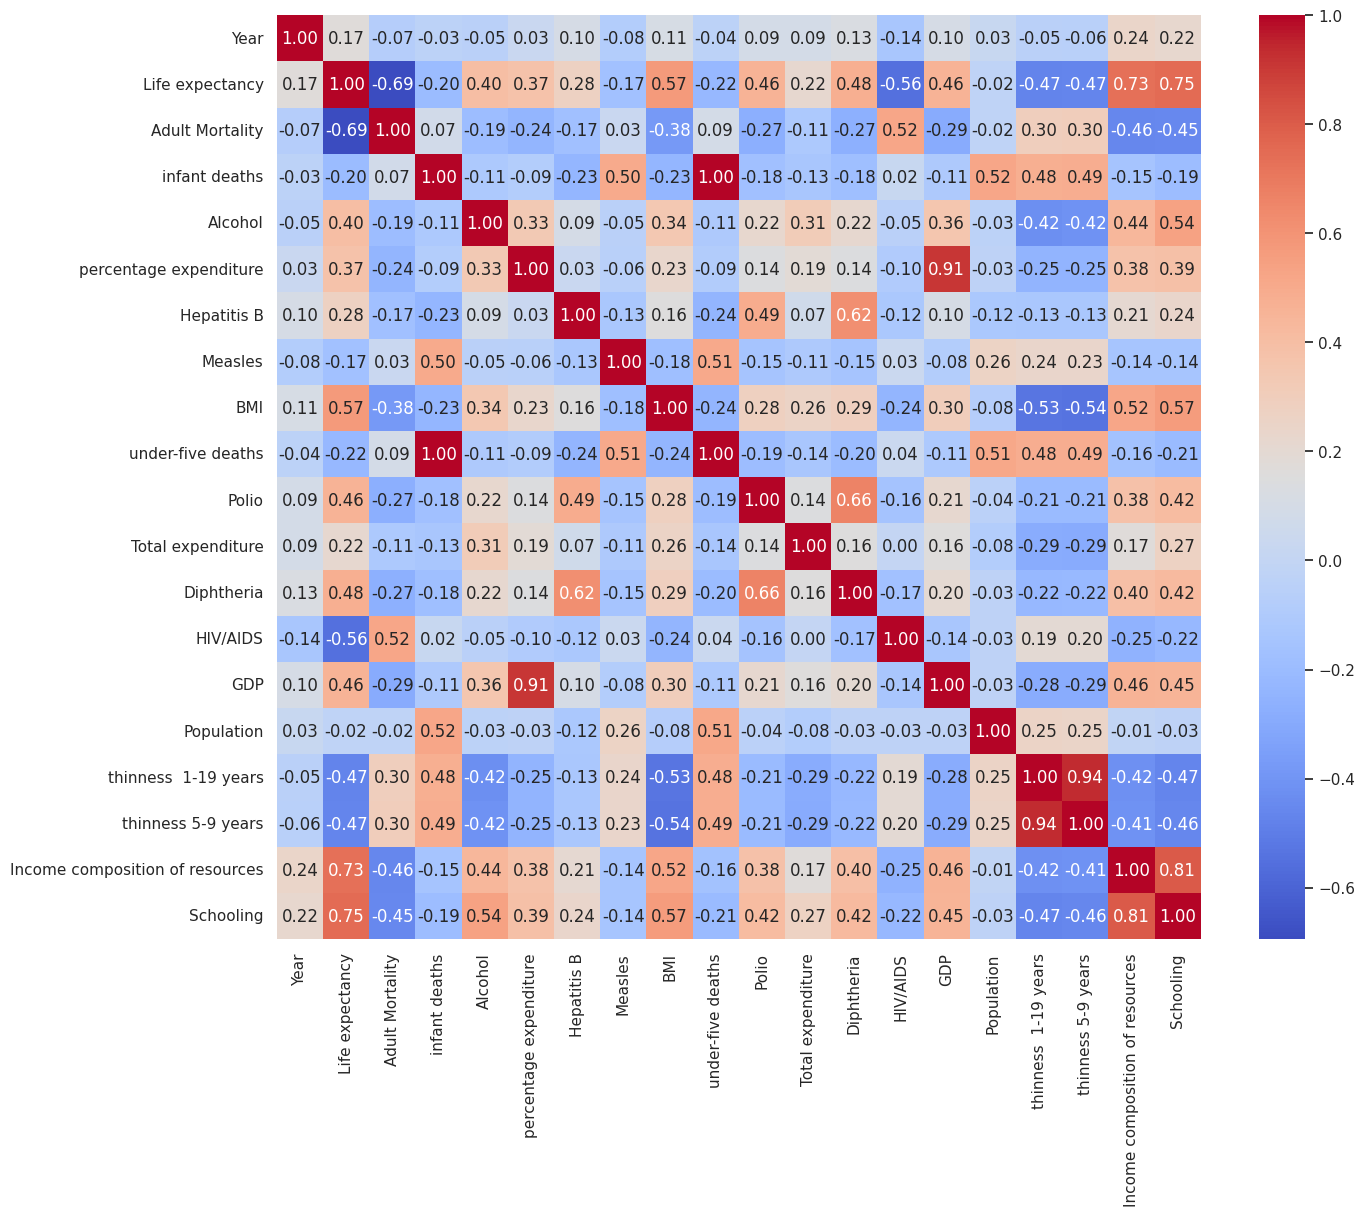

In [120]:
plt.figure(figsize=(15, 12))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [121]:
columns_to_drop = ['under-five deaths', 'GDP', 'Year', 'thinness 5-9 years', 'Population']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

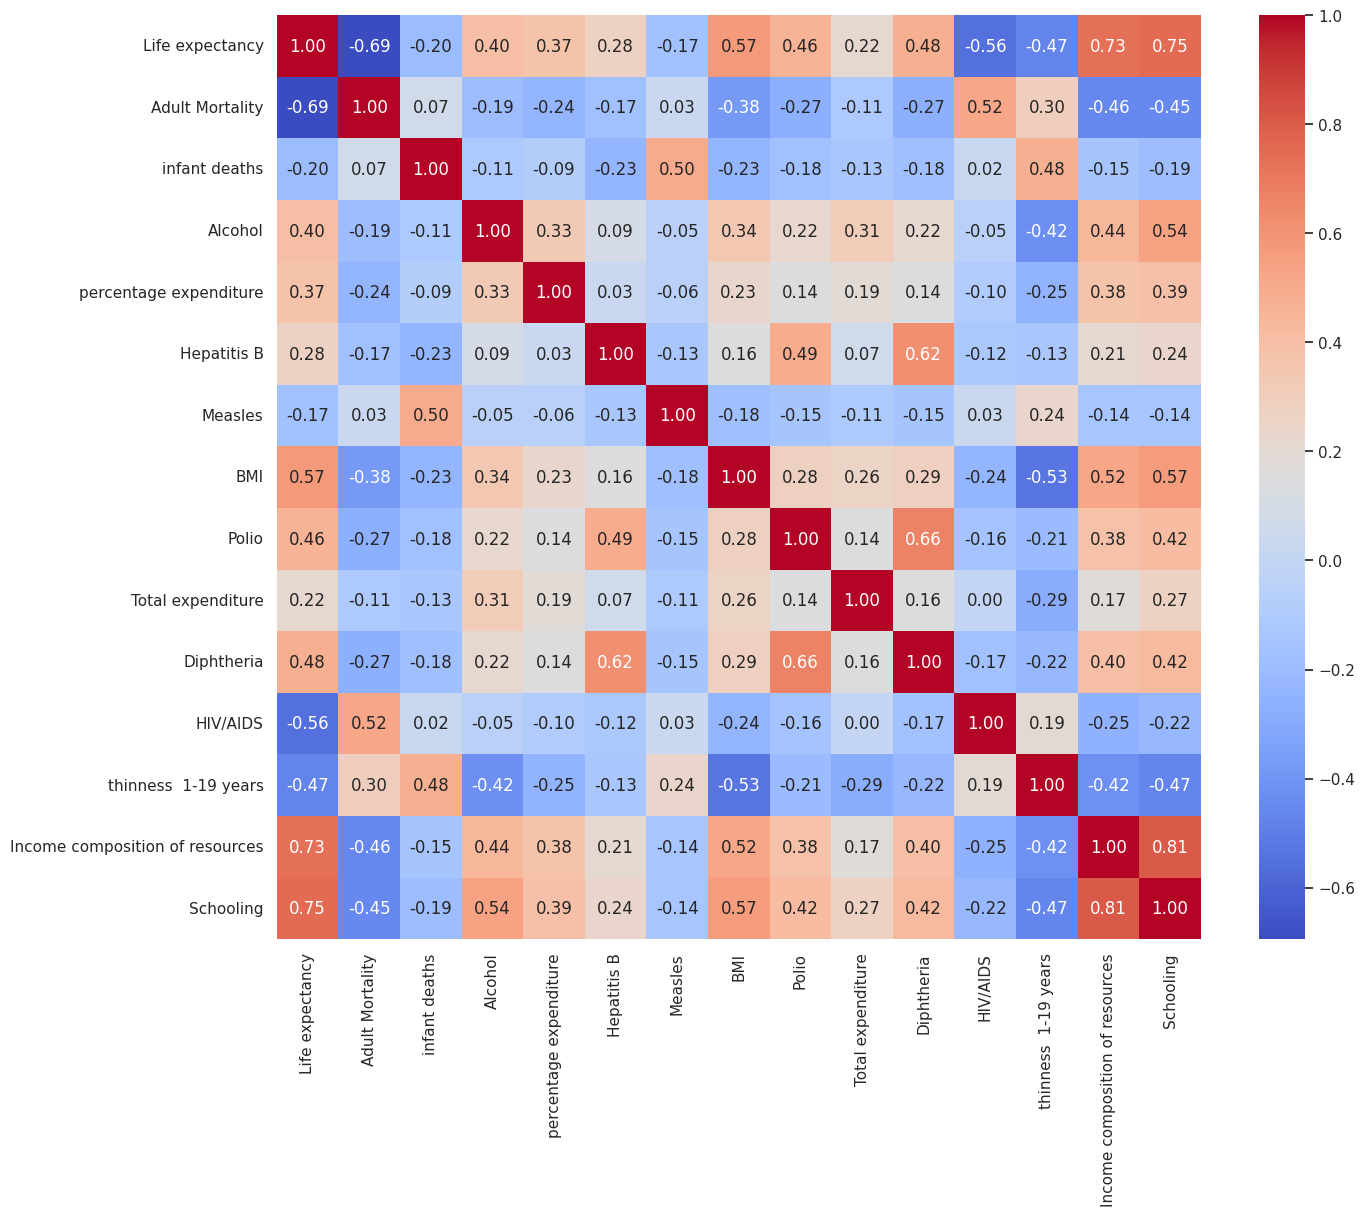

In [122]:
plt.figure(figsize=(15, 12))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [123]:
X = train_data.drop(columns=['Life expectancy'])
y = train_data['Life expectancy']

In [124]:
medians = X.median()

X_imputed = X.fillna(medians)

In [125]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [126]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)

In [127]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)


ridge_model = RidgeCV(alphas=np.logspace(-4, 1, 50), cv=5)
ridge_model.fit(X_train, y_train)
y_val_pred_ridge = ridge_model.predict(X_val)
ridge_mse = mean_squared_error(y_val, y_val_pred_ridge)
print("Ridge Validation MSE:", ridge_mse)


lasso_model = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, max_iter=5000, random_state=42)
lasso_model.fit(X_train, y_train)
y_val_pred_lasso = lasso_model.predict(X_val)
lasso_mse = mean_squared_error(y_val, y_val_pred_lasso)
print("Lasso Validation MSE:", lasso_mse)


if ridge_mse < lasso_mse:
    final_model = ridge_model
else:
    final_model = lasso_model


final_val_mse = min(ridge_mse, lasso_mse)
print("Final Validation MSE:", final_val_mse)


medians_test = test_data.median()


X_test_imputed = test_data.fillna(medians_test)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_poly = poly_features.transform(X_test_scaled)


y_test_pred = final_model.predict(X_test_poly)


submission = pd.DataFrame({
    "index": test_data.index,
    "Life expectancy": y_test_pred
})
submission.to_csv('submission.csv', index=False)

Ridge Validation MSE: 11.625021118527565
Lasso Validation MSE: 10.16645793873972
Final Validation MSE: 10.16645793873972
